In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot

In [2]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/Data analytics Project/heart.csv") #Dataset Path
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# EDA

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


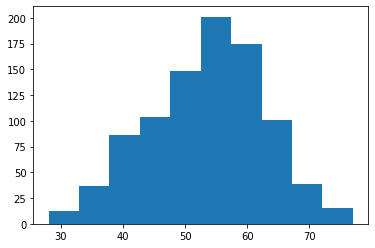

In [7]:
plt.hist(df['Age'])
plt.show()

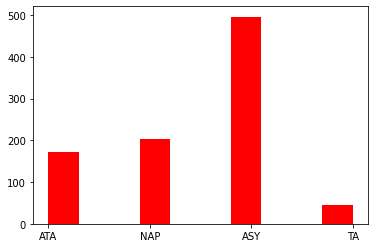

In [8]:
plt.hist(df['ChestPainType'], color = 'red')
plt.show()

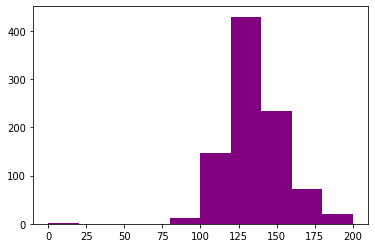

In [9]:
plt.hist(df['RestingBP'], color = 'purple')
plt.show()

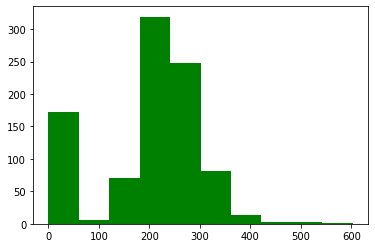

In [10]:
plt.hist(df['Cholesterol'], color = 'green')
plt.show()

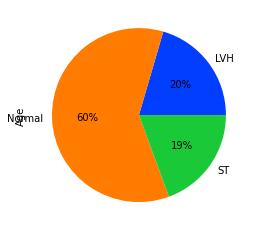

In [11]:
colors = sns.color_palette('bright')[0:5]
pie_data = df.groupby("RestingECG")['Age'].count()
pie_data
pie_data.plot.pie(colors = colors, autopct='%.0f%%')

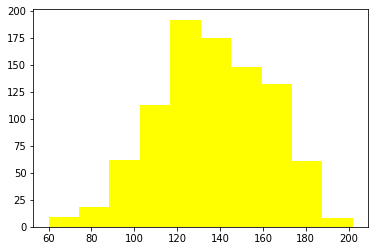

In [12]:
plt.hist(df['MaxHR'], color = 'yellow')
plt.show()

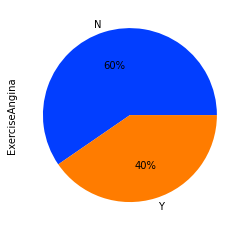

In [13]:
colors = sns.color_palette('bright')[0:5]
pie_data2 = df.groupby("ExerciseAngina")['ExerciseAngina'].count()
pie_data2.plot.pie(colors = colors, autopct='%.0f%%')

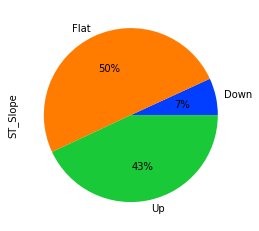

In [14]:
colors = sns.color_palette('bright')[0:5]
pie_data3 = df.groupby("ST_Slope")['ST_Slope'].count()
pie_data3.plot.pie(colors = colors, autopct='%.0f%%')

In [15]:
#removing Outliers in RestingBP - replace with median of accepted range
lower_bound = 0.1
upper_bound = 0.95
outliers = df.RestingBP.quantile([lower_bound, upper_bound])
print(outliers)  

0.10    110.0
0.95    160.0
Name: RestingBP, dtype: float64


In [16]:
accepted_RestingBP = (df.RestingBP.values > outliers.loc[lower_bound]) & (df.RestingBP.values < outliers.loc[upper_bound])
median = np.median(df.RestingBP[accepted_RestingBP])
rejected_RBP = ~(accepted_RestingBP)
df.RestingBP[rejected_RBP] = median     #replace outliers with median of accepted RestingBP
median

130.0

In [17]:
#removing Outliers in Cholesterol - replace with median of accepted range
lower_bound = 0.1
upper_bound = 0.95
outliers = df.Cholesterol.quantile([lower_bound, upper_bound])
print(outliers) 

0.10      0.0
0.95    331.3
Name: Cholesterol, dtype: float64


In [18]:
accepted_Cholesterol = (df.Cholesterol.values > outliers.loc[lower_bound]) & (df.Cholesterol.values < outliers.loc[upper_bound])
median = np.median(df.Cholesterol[accepted_Cholesterol])
rejected_C = ~(accepted_Cholesterol)
df.Cholesterol[rejected_C] = median     #replace outliers with median of accepted Cholesterol
median

233.0

In [19]:
#Saving the dataset as a separate file - after removal of outliers
df.to_csv("heart_after_outlier_removal.csv")

In [20]:
df = pd.read_csv("heart_after_outlier_removal.csv")

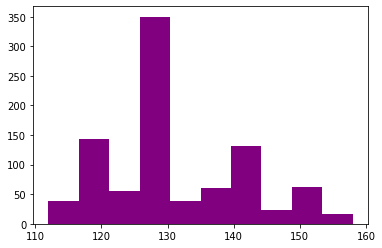

In [21]:
#visualizing the removal of outliers
plt.hist(df['RestingBP'], color = 'purple')
plt.show()

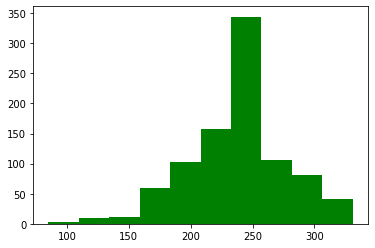

In [22]:
#visualizing the removal of outliers
plt.hist(df['Cholesterol'], color = 'green')
plt.show()

In [23]:
del df['Unnamed: 0'] #removing the column that was automatically added by to_csv method
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.193793,0.063797,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.193793,1.000000,-0.001148,0.033950,-0.045088,0.142213,0.073347
Cholesterol,0.063797,-0.001148,1.000000,0.016227,0.009569,0.047711,0.068786
FastingBS,0.198039,0.033950,0.016227,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.045088,0.009569,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.142213,0.047711,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.073347,0.068786,0.267291,-0.400421,0.403951,1.000000


In [24]:
# prepare data
data = df.loc[:,['RestingBP', 'Cholesterol', 'MaxHR']]
data["index"] = np.arange(1,len(data)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data, diag='box', index='index',colormap='Portland',
                                  height=900, width=900)
iplot(fig)

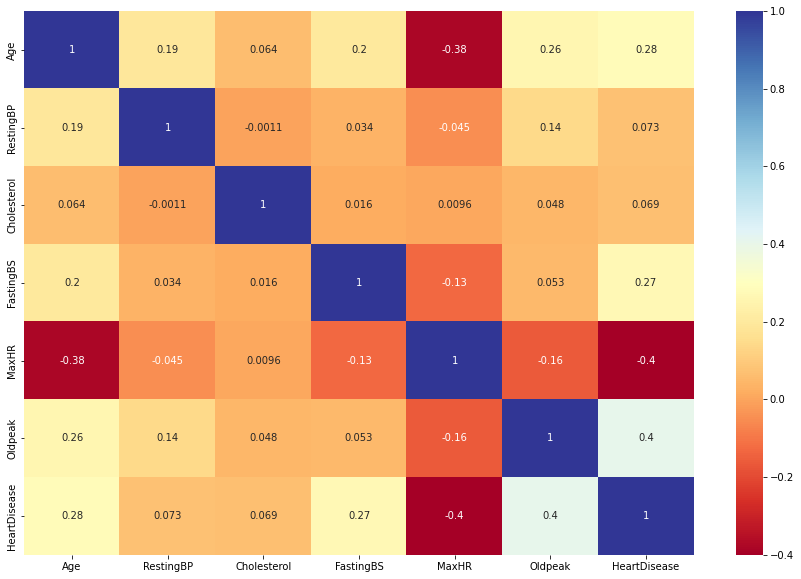

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

# LOGISTIC REGRESSION


In [26]:
X_lr = df.drop(['HeartDisease'], axis=1)
y_lr= df['HeartDisease']

In [27]:
from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 0)

In [28]:
X_train_lr.shape, X_test_lr.shape

((734, 11), (184, 11))

In [29]:
X_train_lr.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,M,ASY,140,233,1,Normal,157,Y,2.0,Flat
356,46,M,ASY,115,233,0,Normal,113,Y,1.5,Flat
738,65,F,NAP,130,233,0,LVH,151,N,0.8,Up
85,66,M,ASY,140,139,0,Normal,94,Y,1.0,Flat
427,59,M,ASY,140,233,0,ST,117,Y,1.0,Flat


In [30]:
# display categorical variables
categorical = [col for col in X_train_lr.columns if X_train_lr[col].dtypes == 'O']
categorical

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [31]:
# display numerical variables
numerical = [col for col in X_train_lr.columns if X_train_lr[col].dtypes != 'O']
numerical

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [32]:
# check missing values in numerical variables in X_train
X_train_lr[numerical].isnull().sum()

Age            0
RestingBP      0
Cholesterol    0
FastingBS      0
MaxHR          0
Oldpeak        0
dtype: int64

In [33]:
X_train_lr[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.633515,131.700272,234.205722,0.217984,136.682561,0.894959
std,9.339761,9.397836,39.503258,0.413158,25.633928,1.047775
min,28.000000,112.000000,85.000000,0.000000,63.000000,-2.600000
25%,47.250000,126.000000,213.000000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,233.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,257.000000,0.000000,156.000000,1.500000
max,77.000000,158.000000,331.000000,1.000000,202.000000,6.200000


Text(0, 0.5, 'MaxHR')

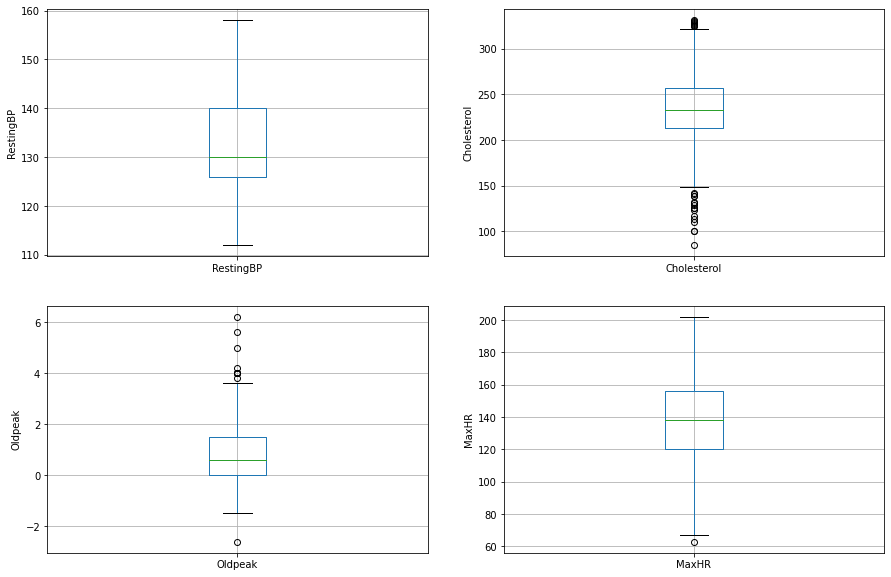

In [34]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = X_train_lr.boxplot(column='RestingBP')
fig.set_title('')
fig.set_ylabel('RestingBP')

plt.subplot(2, 2, 2)
fig = X_train_lr.boxplot(column='Cholesterol')
fig.set_title('')
fig.set_ylabel('Cholesterol')

plt.subplot(2, 2, 3)
fig = X_train_lr.boxplot(column='Oldpeak')
fig.set_title('')
fig.set_ylabel('Oldpeak')

plt.subplot(2, 2, 4)
fig = X_train_lr.boxplot(column='MaxHR')
fig.set_title('')
fig.set_ylabel('MaxHR')

In [35]:
X_train_lr.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.633515,131.700272,234.205722,0.217984,136.682561,0.894959
std,9.339761,9.397836,39.503258,0.413158,25.633928,1.047775
min,28.000000,112.000000,85.000000,0.000000,63.000000,-2.600000
25%,47.250000,126.000000,213.000000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,233.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,257.000000,0.000000,156.000000,1.500000
max,77.000000,158.000000,331.000000,1.000000,202.000000,6.200000


In [36]:
cols = X_train_lr.columns

In [37]:
X_train_lr[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
378,M,ASY,Normal,Y,Flat
356,M,ASY,Normal,Y,Flat
738,F,NAP,LVH,N,Up
85,M,ASY,Normal,Y,Flat
427,M,ASY,ST,Y,Flat


In [38]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


In [39]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Sex'])
X_train_lr = encoder.fit_transform(X_train_lr)
X_test_lr = encoder.transform(X_test_lr)

In [40]:
X_train_lr.head()

,Age,Sex_0,Sex_1,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
378,70,0,1,ASY,140,233,1,Normal,157,Y,2.0,Flat
356,46,0,1,ASY,115,233,0,Normal,113,Y,1.5,Flat
738,65,1,0,NAP,130,233,0,LVH,151,N,0.8,Up
85,66,0,1,ASY,140,139,0,Normal,94,Y,1.0,Flat
427,59,0,1,ASY,140,233,0,ST,117,Y,1.0,Flat


In [41]:
X_train_lr= pd.concat([X_train_lr[numerical], X_train_lr[['Sex_0', 'Sex_1']],
                     pd.get_dummies(X_train_lr.ChestPainType), 
                     pd.get_dummies(X_train_lr.RestingECG),
                     pd.get_dummies(X_train_lr.ExerciseAngina),
                     pd.get_dummies(X_train_lr.ST_Slope)], axis=1)

In [42]:
X_train_lr.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
378,70,140,233,1,157,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
356,46,115,233,0,113,1.5,0,1,1,0,0,0,0,1,0,0,1,0,1,0
738,65,130,233,0,151,0.8,1,0,0,0,1,0,1,0,0,1,0,0,0,1
85,66,140,139,0,94,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
427,59,140,233,0,117,1.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0


In [43]:
X_test_lr = pd.concat([X_test_lr[numerical], X_test_lr[['Sex_0', 'Sex_1']],
                     pd.get_dummies(X_test_lr.ChestPainType), 
                     pd.get_dummies(X_test_lr.RestingECG),
                     pd.get_dummies(X_test_lr.ExerciseAngina),
                     pd.get_dummies(X_test_lr.ST_Slope)], axis=1)

In [44]:
X_test_lr.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
306,55,115,233,1,155,0.1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
711,66,120,302,0,151,0.4,0,1,1,0,0,0,1,0,0,1,0,0,1,0
298,51,130,233,1,92,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
466,55,120,233,0,125,2.5,0,1,0,0,1,0,0,0,1,0,1,0,1,0
253,62,140,271,0,152,1.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1


In [45]:
X_train_lr.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.633515,131.700272,234.205722,0.217984,136.682561,0.894959,0.211172,0.788828,0.532698,0.197548,0.220708,0.049046,0.196185,0.606267,0.197548,0.589918,0.410082,0.070845,0.495913,0.433243
std,9.339761,9.397836,39.503258,0.413158,25.633928,1.047775,0.408418,0.408418,0.499270,0.398420,0.415007,0.216112,0.397381,0.488910,0.398420,0.492184,0.492184,0.256740,0.500324,0.495861
min,28.000000,112.000000,85.000000,0.000000,63.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,126.000000,213.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,233.000000,0.000000,138.000000,0.600000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,140.000000,257.000000,0.000000,156.000000,1.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,158.000000,331.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
cols = X_train_lr.columns

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_lr= scaler.fit_transform(X_train_lr)

X_test_lr= scaler.transform(X_test_lr)

In [48]:
X_train_lr = pd.DataFrame(X_train_lr, columns=[cols])

In [49]:
X_test_lr= pd.DataFrame(X_test_lr, columns=[cols])

In [50]:
X_train_lr.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_0,Sex_1,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,0.523133,0.428267,0.606527,0.217984,0.530090,0.397154,0.211172,0.788828,0.532698,0.197548,0.220708,0.049046,0.196185,0.606267,0.197548,0.589918,0.410082,0.070845,0.495913,0.433243
std,0.190607,0.204301,0.160582,0.413158,0.184417,0.119065,0.408418,0.408418,0.499270,0.398420,0.415007,0.216112,0.397381,0.488910,0.398420,0.492184,0.492184,0.256740,0.500324,0.495861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.392857,0.304348,0.520325,0.000000,0.410072,0.295455,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.391304,0.601626,0.000000,0.539568,0.363636,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.653061,0.608696,0.699187,0.000000,0.669065,0.465909,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

In [51]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train_lr, y_train_lr)

LogisticRegression(random_state=0, solver='liblinear')

In [52]:
y_pred_test_lr= logreg.predict(X_test_lr)
y_pred_test_lr

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1])

In [53]:
# probability of getting output as 0 - no heart disease
logreg.predict_proba(X_test_lr)[:,0]

array([0.05338785, 0.11037779, 0.03464174, 0.18055084, 0.93199866,
       0.70016878, 0.98747623, 0.98319022, 0.93440462, 0.90745828,
       0.04665025, 0.04261408, 0.03324534, 0.03848377, 0.6831292 ,
       0.03625019, 0.07984527, 0.09280761, 0.03849909, 0.76430951,
       0.05443726, 0.04305092, 0.26553885, 0.06159047, 0.97808465,
       0.98812667, 0.04824739, 0.0340082 , 0.06056939, 0.41835885,
       0.01312601, 0.948706  , 0.81217619, 0.86473958, 0.38309723,
       0.93501181, 0.03586731, 0.95593294, 0.39978977, 0.9878919 ,
       0.99129828, 0.04151468, 0.04459112, 0.906399  , 0.11405793,
       0.92079604, 0.99203034, 0.06047993, 0.16021376, 0.87151521,
       0.17641124, 0.73656308, 0.89983951, 0.44634512, 0.04924192,
       0.1286596 , 0.01762808, 0.96902438, 0.64106937, 0.84453304,
       0.0138784 , 0.17327139, 0.24427237, 0.87455188, 0.04282571,
       0.41252031, 0.01325008, 0.09844205, 0.02595107, 0.95757966,
       0.04654925, 0.0997532 , 0.70861242, 0.05295319, 0.11991

In [54]:
# probability of getting output as 1 - heartdisease

logreg.predict_proba(X_test_lr)[:,1]

array([0.94661215, 0.88962221, 0.96535826, 0.81944916, 0.06800134,
       0.29983122, 0.01252377, 0.01680978, 0.06559538, 0.09254172,
       0.95334975, 0.95738592, 0.96675466, 0.96151623, 0.3168708 ,
       0.96374981, 0.92015473, 0.90719239, 0.96150091, 0.23569049,
       0.94556274, 0.95694908, 0.73446115, 0.93840953, 0.02191535,
       0.01187333, 0.95175261, 0.9659918 , 0.93943061, 0.58164115,
       0.98687399, 0.051294  , 0.18782381, 0.13526042, 0.61690277,
       0.06498819, 0.96413269, 0.04406706, 0.60021023, 0.0121081 ,
       0.00870172, 0.95848532, 0.95540888, 0.093601  , 0.88594207,
       0.07920396, 0.00796966, 0.93952007, 0.83978624, 0.12848479,
       0.82358876, 0.26343692, 0.10016049, 0.55365488, 0.95075808,
       0.8713404 , 0.98237192, 0.03097562, 0.35893063, 0.15546696,
       0.9861216 , 0.82672861, 0.75572763, 0.12544812, 0.95717429,
       0.58747969, 0.98674992, 0.90155795, 0.97404893, 0.04242034,
       0.95345075, 0.9002468 , 0.29138758, 0.94704681, 0.88008

In [55]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_lr, y_pred_test_lr)))

Model accuracy score: 0.8152


In [56]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train_lr, y_train_lr)))

Training set score: 0.8815


In [57]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
# fit the model
logreg100.fit(X_train_lr, y_train_lr)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [58]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg100.score(X_train_lr, y_train_lr)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test_lr, y_test_lr)))

Training set score: 0.8733
Test set score: 0.8207


# Decision Tree (DT)

 SPLITTING THE DATA

In [59]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [60]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")


All features are now numerical


In [61]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,130,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,130,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [62]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [63]:
#In this classification problems we do not have a balanced number of examples
#for each class label. As such, we split the dataset into 
#train and test sets in a way that preserves the same proportions of examples
#in each class as observed in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

In [64]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [65]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

In [66]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

,train_set,test_set
Accuracy,1.0,0.811594
Precision,1.0,0.847222
Recall,1.0,0.802632
f1,1.0,0.824324


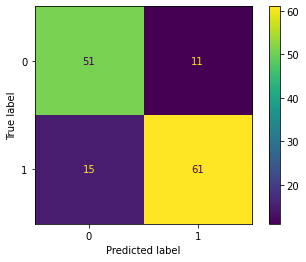

In [67]:
DT_model = DecisionTreeClassifier(class_weight="balanced", random_state=42)
DT_model.fit(X_train_scaled, y_train)
y_pred = DT_model.predict(X_test_scaled)
y_train_pred = DT_model.predict(X_train_scaled)

dt_f1 = f1_score(y_test, y_pred)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)



plot_confusion_matrix(DT_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [68]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [69]:
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=42)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [70]:
DT_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       random_state=42, splitter='random')

,train_set,test_set
Accuracy,0.857692,0.891304
Precision,0.839323,0.850575
Recall,0.918981,0.973684
f1,0.877348,0.907975


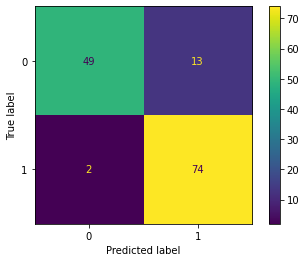

In [71]:
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)


plot_confusion_matrix(DT_grid_model, X_test_scaled, y_test)

train_val(y_train, y_train_pred, y_test, y_pred)

In [72]:
DT_grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=3,
                       random_state=42, splitter='random')

# RANDOM FOREST

In [73]:
X_rf = df.drop(['HeartDisease'], axis=1)
y_rf = df['HeartDisease']

SPLITTING THE DATA

In [74]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.33, random_state = 42)

In [75]:
# check the shape of X_train and X_test
X_train_rf.shape, X_test_rf.shape

((615, 11), (303, 11))

In [76]:
X_train_rf.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
dtype: object

In [77]:
X_train_rf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
585,57,1,1,130,285,1,2,120,0,0.8,1
169,58,1,2,140,179,0,1,160,0,0.0,2
602,61,1,2,120,233,0,1,98,1,0.0,1
140,52,1,0,130,331,0,1,94,1,2.5,1
173,49,1,2,140,187,0,1,172,0,0.0,2


ENCODING

In [78]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=categorical)
X_train_rf = encoder.fit_transform(X_train_rf)
X_test_rf = encoder.transform(X_test_rf)

In [79]:
X_train_rf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
585,57,1,1,130,285,1,1,120,1,0.8,1
169,58,1,2,140,179,0,2,160,1,0.0,2
602,61,1,2,120,233,0,2,98,2,0.0,1
140,52,1,3,130,331,0,2,94,2,2.5,1
173,49,1,2,140,187,0,2,172,1,0.0,2


In [80]:
X_test_rf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,2,1,140,195,0,2,179,1,0.0,2
30,53,1,2,145,233,0,2,130,1,0.0,1
377,65,1,3,130,233,1,1,122,1,1.2,1
535,56,1,3,130,233,0,3,122,2,1.0,1
807,54,1,1,130,309,0,2,156,1,0.0,2


# MODELING

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train_rf, y_train_rf)
# Predict on the test set results
y_pred_100_rf = rfc_100.predict(X_test_rf)

In [83]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test_rf, y_pred_100_rf)))

Model accuracy score with 100 decision-trees : 0.8515
